In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
cocoa = os.path.join("flavors_of_cacao.csv")
cocoa_df = pd.read_csv(cocoa)
cocoa_df.head()
cocoa_df.columns = ['Company', 'Brandname', 'REF', 'Review Date', 'Percent of Cacao', 'Company Location', 'Rating', 'Bean', 'Origin Location']
cocoa_df.head()

,Company,Brandname,REF,Review Date,Percent of Cacao,Company Location,Rating,Bean,Origin Location
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
cocoa_df.columns

Index(['Company', 'Brandname', 'REF', 'Review Date', 'Percent of Cacao',
       'Company Location', 'Rating', 'Bean', 'Origin Location'],
      dtype='object')

In [4]:
bean_types = cocoa_df["Bean"].unique()
len(bean_types)

42

In [5]:
# Grouping by Bean Type and Ratings, then sorting to find the best bean type for chocolate.

num_of_ratings = cocoa_df.groupby("Bean")['Rating'].count()
mean_of_bean_type = cocoa_df.groupby("Bean")['Rating'].mean()

mean_bean_ratings = pd.DataFrame({
    "Num of Ratings": num_of_ratings,
    "Ave of Ratings": mean_of_bean_type
})

mean_bean_ratings.index

Index(['Amazon', 'Amazon mix', 'Amazon, ICS', 'Beniano', 'Blend',
       'Blend-Forastero,Criollo', 'CCN51', 'Criollo', 'Criollo (Amarru)',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 67)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare)', 'Criollo (Porcelana)', 'Criollo (Wild)',
       'Criollo, +', 'Criollo, Forastero', 'Criollo, Trinitario', 'EET',
       'Forastero', 'Forastero (Amelonado)', 'Forastero (Arriba)',
       'Forastero (Arriba) ASS', 'Forastero (Arriba) ASSS',
       'Forastero (Catongo)', 'Forastero (Nacional)', 'Forastero (Parazinho)',
       'Forastero(Arriba, CCN)', 'Forastero, Trinitario', 'Matina', 'Nacional',
       'Nacional (Arriba)', 'Trinitario', 'Trinitario (85% Criollo)',
       'Trinitario (Amelonado)', 'Trinitario (Scavina)', 'Trinitario, Criollo',
       'Trinitario, Forastero', 'Trinitario, Nacional', 'Trinitario, TCGA',
       ' '],
      dtype='object', name='Bean')

In [6]:
# The best rated chocolates have only one or two ratings, so let's look at the best rated chocolates that 
# have more than 8 ratings, and less than 800 to get rid of unlabeled bean and bean blends

best_reviewed_beans = mean_bean_ratings.loc[(mean_bean_ratings["Num of Ratings"] >= 8) & (
                                           mean_bean_ratings["Num of Ratings"] <= 800)] 
best_reviewed_beans.sort_values("Ave of Ratings", ascending=False)

,Num of Ratings,Ave of Ratings
Bean,,
Forastero (Parazinho),8,3.531250
Criollo (Porcelana),10,3.375000
Blend,41,3.353659
"Criollo, Trinitario",39,3.294872
Forastero (Nacional),52,3.269231
Trinitario,419,3.245823
Criollo,153,3.240196
Forastero,87,3.100575
"Trinitario, Criollo",9,3.027778


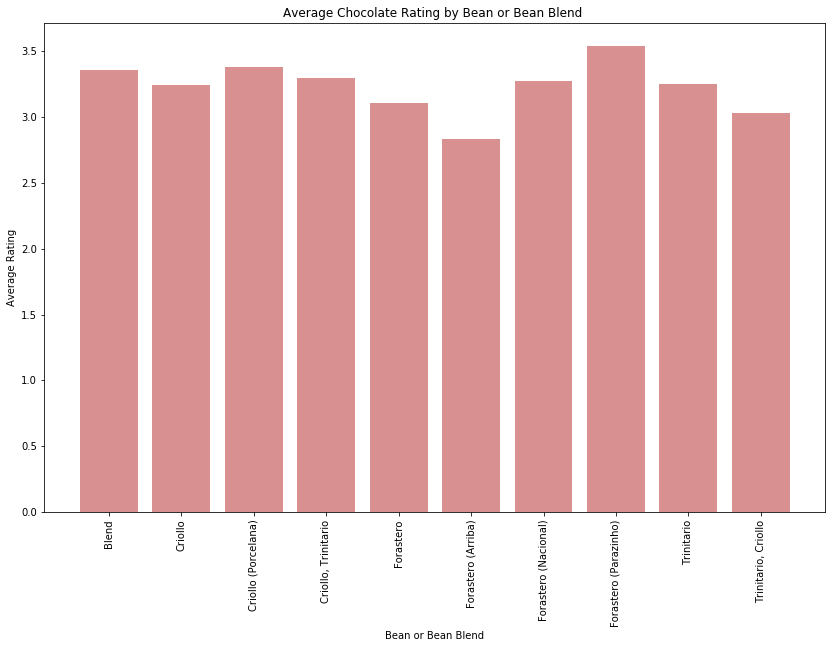

In [56]:
# Bar chart, which shows only some difference between the beans

plt.figure(figsize=(14, 9))
x_axis = best_reviewed_beans.index
tick_locations = [value for value in x_axis]
plt.xlabel("Bean or Bean Blend")
plt.ylabel("Average Rating")
plt.title("Average Chocolate Rating by Bean or Bean Blend ")
plt.xticks(rotation="90")
plt.bar(tick_locations, best_reviewed_beans["Ave of Ratings"], color='firebrick', alpha=0.5, align='center')
plt.savefig("Images/bean_blend_ratings.png")

In [8]:
# Locate the chocolates that have a rating under 2.5, how of these bad chocolates make up the dataset?
bad_chocolate = cocoa_df.loc[cocoa_df['Rating'] <= 2.5]

bad_num_of_ratings = bad_chocolate.groupby("Bean")['Rating'].count()
bad_mean_of_bean_type = bad_chocolate.groupby("Bean")['Rating'].mean()

bad_chocolate = pd.DataFrame({
    "Num of Ratings": bad_num_of_ratings,
    "Ave of Ratings": bad_mean_of_bean_type
})

bad_chocolate.sort_values('Ave of Ratings', ascending=False)

,Num of Ratings,Ave of Ratings
Bean,,
Criollo (Porcelana),1,2.500000
"Criollo, Trinitario",2,2.500000
Nacional,1,2.500000
Criollo,15,2.450000
"Trinitario, Criollo",3,2.416667
Trinitario,24,2.406250
Forastero (Nacional),3,2.333333
,107,2.268692
Blend,4,2.250000


In [9]:
# Get the bad chocolates that have 3 or more ratings and less than 100 to get rid of unlabel chocolates
bad_chocolates_rated = bad_chocolate.loc[(bad_chocolate["Num of Ratings"] >= 3) & (bad_chocolate["Num of Ratings"] <= 100)]
bad_chocolates_rated

,Num of Ratings,Ave of Ratings
Bean,,
Blend,4,2.250000
Criollo,15,2.450000
Forastero,14,2.232143
Forastero (Arriba),14,2.214286
Forastero (Nacional),3,2.333333
Trinitario,24,2.406250
"Trinitario, Criollo",3,2.416667


<BarContainer object of 7 artists>

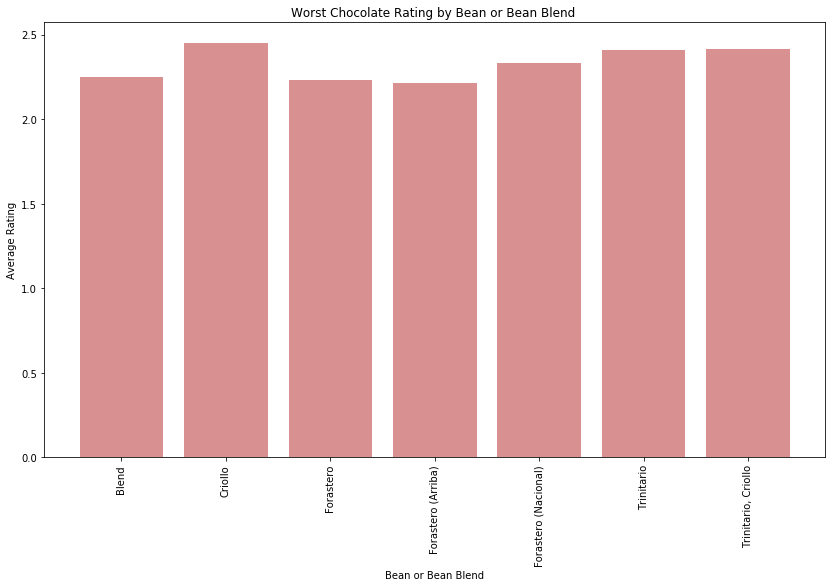

In [36]:
# Bar chart for the bad chocolate, which shows only some difference between the beans

plt.figure(figsize=(14, 8))
x_axis = bad_chocolates_rated.index
tick_locations = [value for value in x_axis]
plt.xlabel("Bean or Bean Blend")
plt.ylabel("Average Rating")
plt.title("Worst Chocolate Rating by Bean or Bean Blend ")
plt.xticks(rotation="90")
plt.bar(tick_locations, bad_chocolates_rated["Ave of Ratings"], color='firebrick', alpha=0.5, align='center')

In [11]:
# Locate the best chocolates, how many have a rating of 4.0 or better
best_chocolates = cocoa_df.loc[cocoa_df['Rating'] >= 3.79]
len(best_chocolates)

100

In [12]:
best_num_of_ratings = best_chocolates.groupby("Bean")['Rating'].count()
best_mean_of_bean_type = best_chocolates.groupby("Bean")['Rating'].mean()

best_chocolate = pd.DataFrame({
    "Num of Ratings": best_num_of_ratings,
    "Ave of Ratings": best_mean_of_bean_type
})

best_chocolate.sort_values('Ave of Ratings', ascending=False)

,Num of Ratings,Ave of Ratings
Bean,,
Blend,6,4.166667
Trinitario,26,4.038462
Amazon mix,1,4.000000
Beniano,1,4.000000
Criollo,14,4.000000
Criollo (Ocumare 67),1,4.000000
Criollo (Porcelana),3,4.000000
Criollo (Wild),1,4.000000
"Criollo, Trinitario",4,4.000000


In [13]:
# Get the best chocolates that have 3 or more ratings and less than 30 to get rid of unlabel chocolates
best_rated_chocolate = best_chocolate.loc[(best_chocolate["Num of Ratings"] >= 3) & (best_chocolate["Num of Ratings"] <= 30)]
best_rated_chocolate

,Num of Ratings,Ave of Ratings
Bean,,
Blend,6,4.166667
Criollo,14,4.000000
Criollo (Porcelana),3,4.000000
"Criollo, Trinitario",4,4.000000
Forastero,4,4.000000
Forastero (Nacional),3,4.000000
Trinitario,26,4.038462


<BarContainer object of 7 artists>

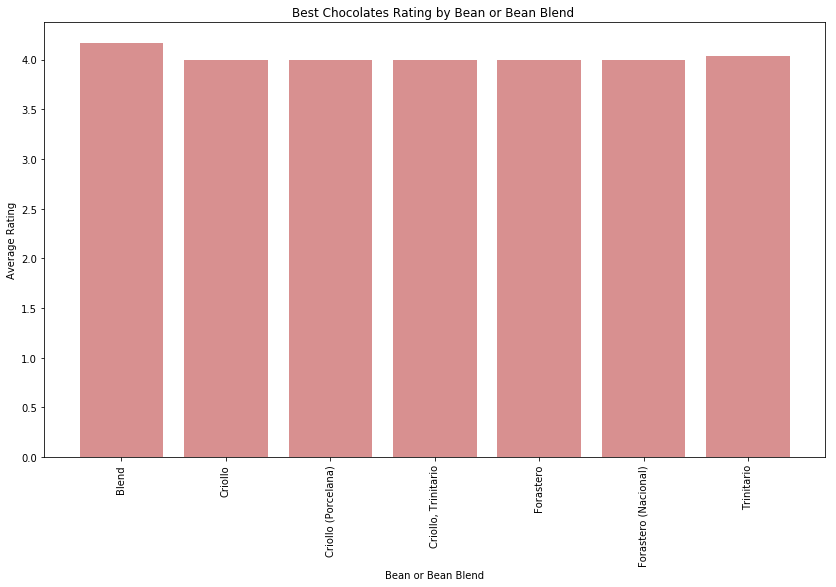

In [38]:
# Bar chart for the best chocolate, which shows only some difference between the beans

plt.figure(figsize=(14, 8))
x_axis = best_rated_chocolate.index
tick_locations = [value for value in x_axis]
plt.xlabel("Bean or Bean Blend")
plt.ylabel("Average Rating")
plt.title("Best Chocolates Rating by Bean or Bean Blend ")
plt.xticks(rotation="90")
plt.bar(tick_locations, best_rated_chocolate["Ave of Ratings"], color='firebrick', alpha=0.5, align='center')

In [15]:
cocoa_df['bean_type_1'] = cocoa_df.Bean.str.split('(').str.get(0)
cocoa_df['bean_type_2'] = cocoa_df.Bean.str.split('(').str.get(1)
cocoa_df['blend?'] = pd.np.where(cocoa_df.Bean.str.contains(","), "Yes", 'No')
cocoa_df['bean_type_1'] = cocoa_df['bean_type_1'].replace({'Forastero ': 'Forastero', 'Criollo ': 'Criollo', 'Trinitario ': 'Trinitario',
                                                          'Criollo, Trinitario': 'Blend', 'Trinitario, Criollo': 'Blend', 'Criollo, Forastero': 'Blend',
                                                          'Trinitario, Forastero': 'Blend', 'Forastero, Trinitario': 'Blend', 'Blend-Forastero,Criollo': 'Blend'})

In [16]:
cocoa_df

,Company,Brandname,REF,Review Date,Percent of Cacao,Company Location,Rating,Bean,Origin Location,bean_type_1,bean_type_2,blend?
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,,NaN,No
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,,NaN,No
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,,NaN,No
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,,NaN,No
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,,NaN,No
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela,Criollo,NaN,No
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba,,NaN,No
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela,Criollo,NaN,No
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela,Criollo,NaN,No
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru,,NaN,No


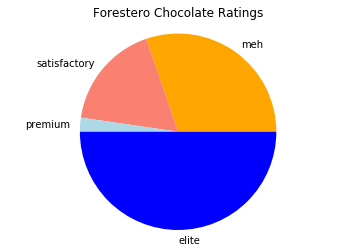

In [57]:
# Lets make a pie chart for the forestero types of beans 
# 5= Elite (Transcending beyond the ordinary limits)
# 4= Premium (Superior flavor development, character and style)
# 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
# 2= Disappointing (Passable but contains at least one significant flaw)
# 1= Unpleasant (mostly unpalatable)

forastero = pd.DataFrame(cocoa_df.loc[cocoa_df["bean_type_1"] == "Forastero"])
#forastero_bad = forastero.loc[forastero["Rating"] < 2.5]
#f_bad = forastero_bad["Rating"].count()
forastero_meh = forastero.loc[forastero["Rating"] < 3.5]
f_meh = forastero_meh["Rating"].count()
forastero_satisfactory = forastero.loc[(forastero["Rating"] >= 3.5) & (forastero["Rating"] < 3.9)]
f_satisfactory = forastero_satisfactory["Rating"].count()
forastero_premium = forastero.loc[(forastero["Rating"] >= 4) & (forastero["Rating"] < 4.9)]
f_premium = forastero_premium["Rating"].count()
forastero_elite = forastero.loc[forastero["Rating"] == 5] 
f_elite = forastero["Rating"].count()

labels = ["meh", "satisfactory", "premium", "elite"]
sizes = [f_meh, f_satisfactory, f_premium, f_elite]
colors = ["orange", "salmon", "lightblue", "blue"]

plt.pie(sizes, labels=labels, colors=colors)
plt.title("Forestero Chocolate Ratings")
plt.axis("equal")
plt.savefig("Images/forestero_proportions.png")

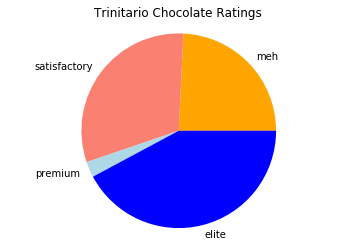

In [58]:
# Lets make a pie chart for the Trinitario types of beans 

trinitario = pd.DataFrame(cocoa_df.loc[cocoa_df["bean_type_1"] == "Trinitario"])
# trinitario_bad = trinitario.loc[trinitario["Rating"] < 2.5]
# t_bad = trinitario_bad["Rating"].count()
trinitario_disappointing = trinitario.loc[trinitario["Rating"] < 3.5] 
t_disappointing = trinitario_disappointing["Rating"].count()
trinitario_satisfactory = trinitario.loc[(trinitario["Rating"] >= 3) & (trinitario["Rating"] < 3.9)]
t_satisfactory = trinitario_satisfactory["Rating"].count()
trinitario_premium = trinitario.loc[(trinitario["Rating"] >= 4) & (trinitario["Rating"] < 4.9)]
t_premium = trinitario_premium["Rating"].count()
trinitario_elite = trinitario.loc[trinitario["Rating"] == 5]
t_elite = trinitario["Rating"].count()

labels = ["meh", "satisfactory", "premium", "elite"]
sizes = [t_disappointing, t_satisfactory, t_premium, t_elite]
colors = ["orange", "salmon", "lightblue", "blue"]

plt.pie(sizes, labels=labels, colors=colors)
plt.title("Trinitario Chocolate Ratings")
plt.axis("equal")
plt.savefig("Images/trinitario_proportions.png")

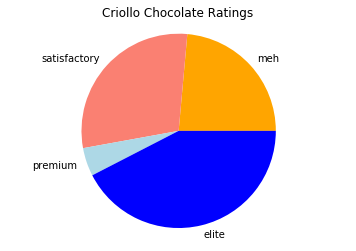

In [59]:
# Lets make a pie chart for the Criollo types of beans by low, meh, medium, high

criollo = pd.DataFrame(cocoa_df.loc[cocoa_df["bean_type_1"] == "Criollo"])
# criollo_unpleasant = criollo.loc[criollo["Rating"] < 2.5]
# c_bad = criollo_unpleasant["Rating"].count()
criollo_disappointing = criollo.loc[criollo["Rating"] < 3.5] 
c_meh = criollo_disappointing["Rating"].count()
criollo_satisfactory = criollo.loc[(criollo["Rating"] >= 3) & (criollo["Rating"] < 3.9)]
c_satisfactory = criollo_satisfactory["Rating"].count()
criollo_premium = criollo.loc[(criollo["Rating"] >= 4) & (criollo["Rating"] < 4.9)]
c_premium = criollo_premium["Rating"].count()
criollo_elite = criollo.loc[criollo["Rating"] == 5]
c_elite = criollo["Rating"].count()

labels = ["meh", "satisfactory", "premium", "elite"]
sizes = [c_meh, c_satisfactory, c_premium, c_elite]
colors = ["orange", "salmon", "lightblue", "blue"]

plt.pie(sizes, labels=labels, colors=colors)
plt.title("Criollo Chocolate Ratings")
plt.axis("equal")
plt.savefig("Images/criollo_proportions.png")